In [1]:
import numpy as np

import matplotlib.pyplot as plt
# from scinet import *
import ed_quantum as edq
%load_ext autoreload

for data creation and saving the the model

In [2]:
# # %autoreload
# for inc_tom_m1 in [2, False]:
#     label = 'incomp' if inc_tom_m1 else 'comp'
#     edq.create_data(1, 10, 10, 100000, 'one_qubit_{}'.format(label), incomplete_tomography=[inc_tom_m1, False])
#     td, vd, ts, vs, projectors = dl.load(5, 'one_qubit_{}'.format(label))
#     for s in range(5):
#         for i in range(3):
#             name = 'one_qubit_{}_{}_{}'.format(label, s, i)
#             net = nn.Network(10, s, 10, 1, name=name, encoder_num_units=[100, 100], decoder_num_units=[100, 100])
#             net.train(250, 512, 1e-3, td, vd, beta_fun=lambda x: 1.e-4, test_step=10)
#             net.train(50, 512, 1e-4, td, vd, beta_fun=lambda x: 1.e-4, test_step=10)
#             net.save(name)
#             ra = net.run(vd, net.recon_loss)
#             print ra

In [3]:
import data_loader as dl


In [4]:
import model as nn

## Load pre-trained models

In [5]:
err = []
for label in ['comp', 'incomp']:
    file_name = 'one_qubit_{}'.format(label)
    td, vd, ts, vs, projectors = dl.load(5, file_name)
    err_label = []
    for s in range(5):
        err_s = []
        for i in range(3):
            name = 'one_qubit_{}_{}_{}'.format(label, s, i)
            net = nn.Network.from_saved(name)
            print(np.sqrt(net.run(vd, net.recon_loss)))
            err_s.append(np.sqrt(net.run(vd, net.recon_loss)))
        err_label.append(min(err_s))
    err.append(err_label)

{'decoder_num_units': [100, 100], 'input2_size': 10, 'tot_epochs': 300, 'latent_size': 0, 'output_size': 1, 'encoder_num_units': [100, 100], 'input_size': 10, 'name': 'one_qubit_comp_0_0', 'load_file': 'one_qubit_comp_0_0'}
INFO:tensorflow:Restoring parameters from /Users/karthikeyavadlamudi/Desktop/tf_save/one_qubit_comp_0_0.ckpt
Loaded network from file one_qubit_comp_0_0
0.29846773
{'decoder_num_units': [100, 100], 'input2_size': 10, 'tot_epochs': 300, 'latent_size': 0, 'output_size': 1, 'encoder_num_units': [100, 100], 'input_size': 10, 'name': 'one_qubit_comp_0_1', 'load_file': 'one_qubit_comp_0_1'}
INFO:tensorflow:Restoring parameters from /Users/karthikeyavadlamudi/Desktop/tf_save/one_qubit_comp_0_1.ckpt
Loaded network from file one_qubit_comp_0_1
0.29846236
{'decoder_num_units': [100, 100], 'input2_size': 10, 'tot_epochs': 300, 'latent_size': 0, 'output_size': 1, 'encoder_num_units': [100, 100], 'input_size': 10, 'name': 'one_qubit_comp_0_2', 'load_file': 'one_qubit_comp_0_2'}


In [6]:
# latent_neurons = np.arange(5)
# blue_color='#000cff'
# orange_color='#ff7700'
# fig = plt.figure(figsize=(3.4, 2.1))
# ax = fig.add_subplot(111)
# width = 0.32
# ax.bar(latent_neurons - width/2., err[0], width=width, label='Tom. complete', color=blue_color)
# ax.bar(latent_neurons + width/2., err[1], width=width, label='Tom. incomplete', color=orange_color)
# ax.legend()
# ax.set_xticks(latent_neurons)
# ax.set_xlabel('Number of latent neurons')
# ax.set_ylabel('Error of predictions')
# fig.tight_layout()

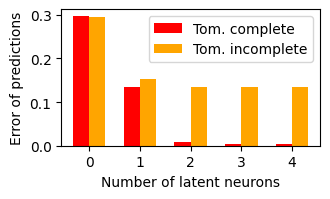

In [7]:
import numpy as np
import matplotlib.pyplot as plt


latent_neurons = np.arange(5)
blue_color = '#FF0000'  # Changing blue color to cyan
orange_color = '#FFA500'  # Changing orange color to orange

fig = plt.figure(figsize=(3.4, 2.1))
ax = fig.add_subplot(111)
width = 0.32
ax.bar(latent_neurons - width/2., err[0], width=width, label='Tom. complete', color=blue_color)
ax.bar(latent_neurons + width/2., err[1], width=width, label='Tom. incomplete', color=orange_color)
ax.legend()
ax.set_xticks(latent_neurons)
ax.set_xlabel('Number of latent neurons')
ax.set_ylabel('Error of predictions')
fig.tight_layout()

# Find optimal latent neurons
min_err_index = np.argmin(np.mean(err, axis=0))
optimal_neurons = latent_neurons[min_err_index]
# print("Optimal latent neurons:", optimal_neurons)

plt.show()
